## check out fantasy page and get scores for each week
# https://stmorse.github.io/journal/espn-fantasy-python.html


In [1]:
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
scores = {}
for week in range(1, 11):
    r = requests.get('http://games.espn.com/ffl/api/v2/scoreboard', 
                     params={'leagueId': 696100, 'seasonId': 2018, 'matchupPeriodId': week})
    scores[week] = r.json()
    
df = []
for key in scores:
    temp = scores[key]['scoreboard']['matchups']
    for match in temp:
        df.append([key, 
                   match['teams'][0]['team']['teamAbbrev'],
                   match['teams'][0]['team']['teamId'],
                   match['teams'][0]['score']])
        
        df.append([key, 
                   match['teams'][1]['team']['teamAbbrev'],
                   match['teams'][1]['team']['teamId'],
                   match['teams'][1]['score']])
        
df = pd.DataFrame(df, columns=['Week', 'teamAbbrev', 'teamId', 'Score'])

In [3]:
df

,Week,teamAbbrev,teamId,Score
0,1,SH80,1,86
1,1,187,6,122
2,1,RUN,7,99
3,1,CMAC,3,78
4,1,POOP,9,104
5,1,PHFV,8,103
6,1,UU,2,103
7,1,NLNG,5,87
8,1,BJ,4,99
9,1,kOrO,10,95


In [18]:
scores = {}
for week in range(1, 15):
    r = requests.get('http://games.espn.com/ffl/api/v2/scoreboard', 
                     params={'leagueId': 696100, 'seasonId': 2018, 'matchupPeriodId': week})
    scores[week] = r.json()
        
df2 = []
for key in scores:
    temp = scores[key]['scoreboard']['matchups']
    for match in temp:
        df2.append([key, 
                    match['teams'][0]['team']['teamAbbrev'],
                    match['teams'][1]['team']['teamAbbrev'],
                    match['teams'][0]['team']['teamId'],
                    match['teams'][1]['team']['teamId'],
                    match['teams'][0]['score'],
                    match['teams'][1]['score'],
                    0])
        
df2 = pd.DataFrame(df2, columns=['Week', 'teamAbbrev0', 'teamAbbrev1', 
                               'teamId0', 'teamId1', 'Score0', 'Score1','Winner'])

In [19]:
df2

,Week,teamAbbrev0,teamAbbrev1,teamId0,teamId1,Score0,Score1,Winner
0,1,SH80,187,1,6,86,122,0
1,1,RUN,CMAC,7,3,99,78,0
2,1,POOP,PHFV,9,8,104,103,0
3,1,UU,NLNG,2,5,103,87,0
4,1,BJ,kOrO,4,10,99,95,0
5,2,187,CMAC,6,3,117,102,0
6,2,PHFV,SH80,8,1,101,68,0
7,2,NLNG,RUN,5,7,95,81,0
8,2,kOrO,POOP,10,9,74,63,0
9,2,BJ,UU,4,2,102,100,0


## Plot scores of each team over weeks

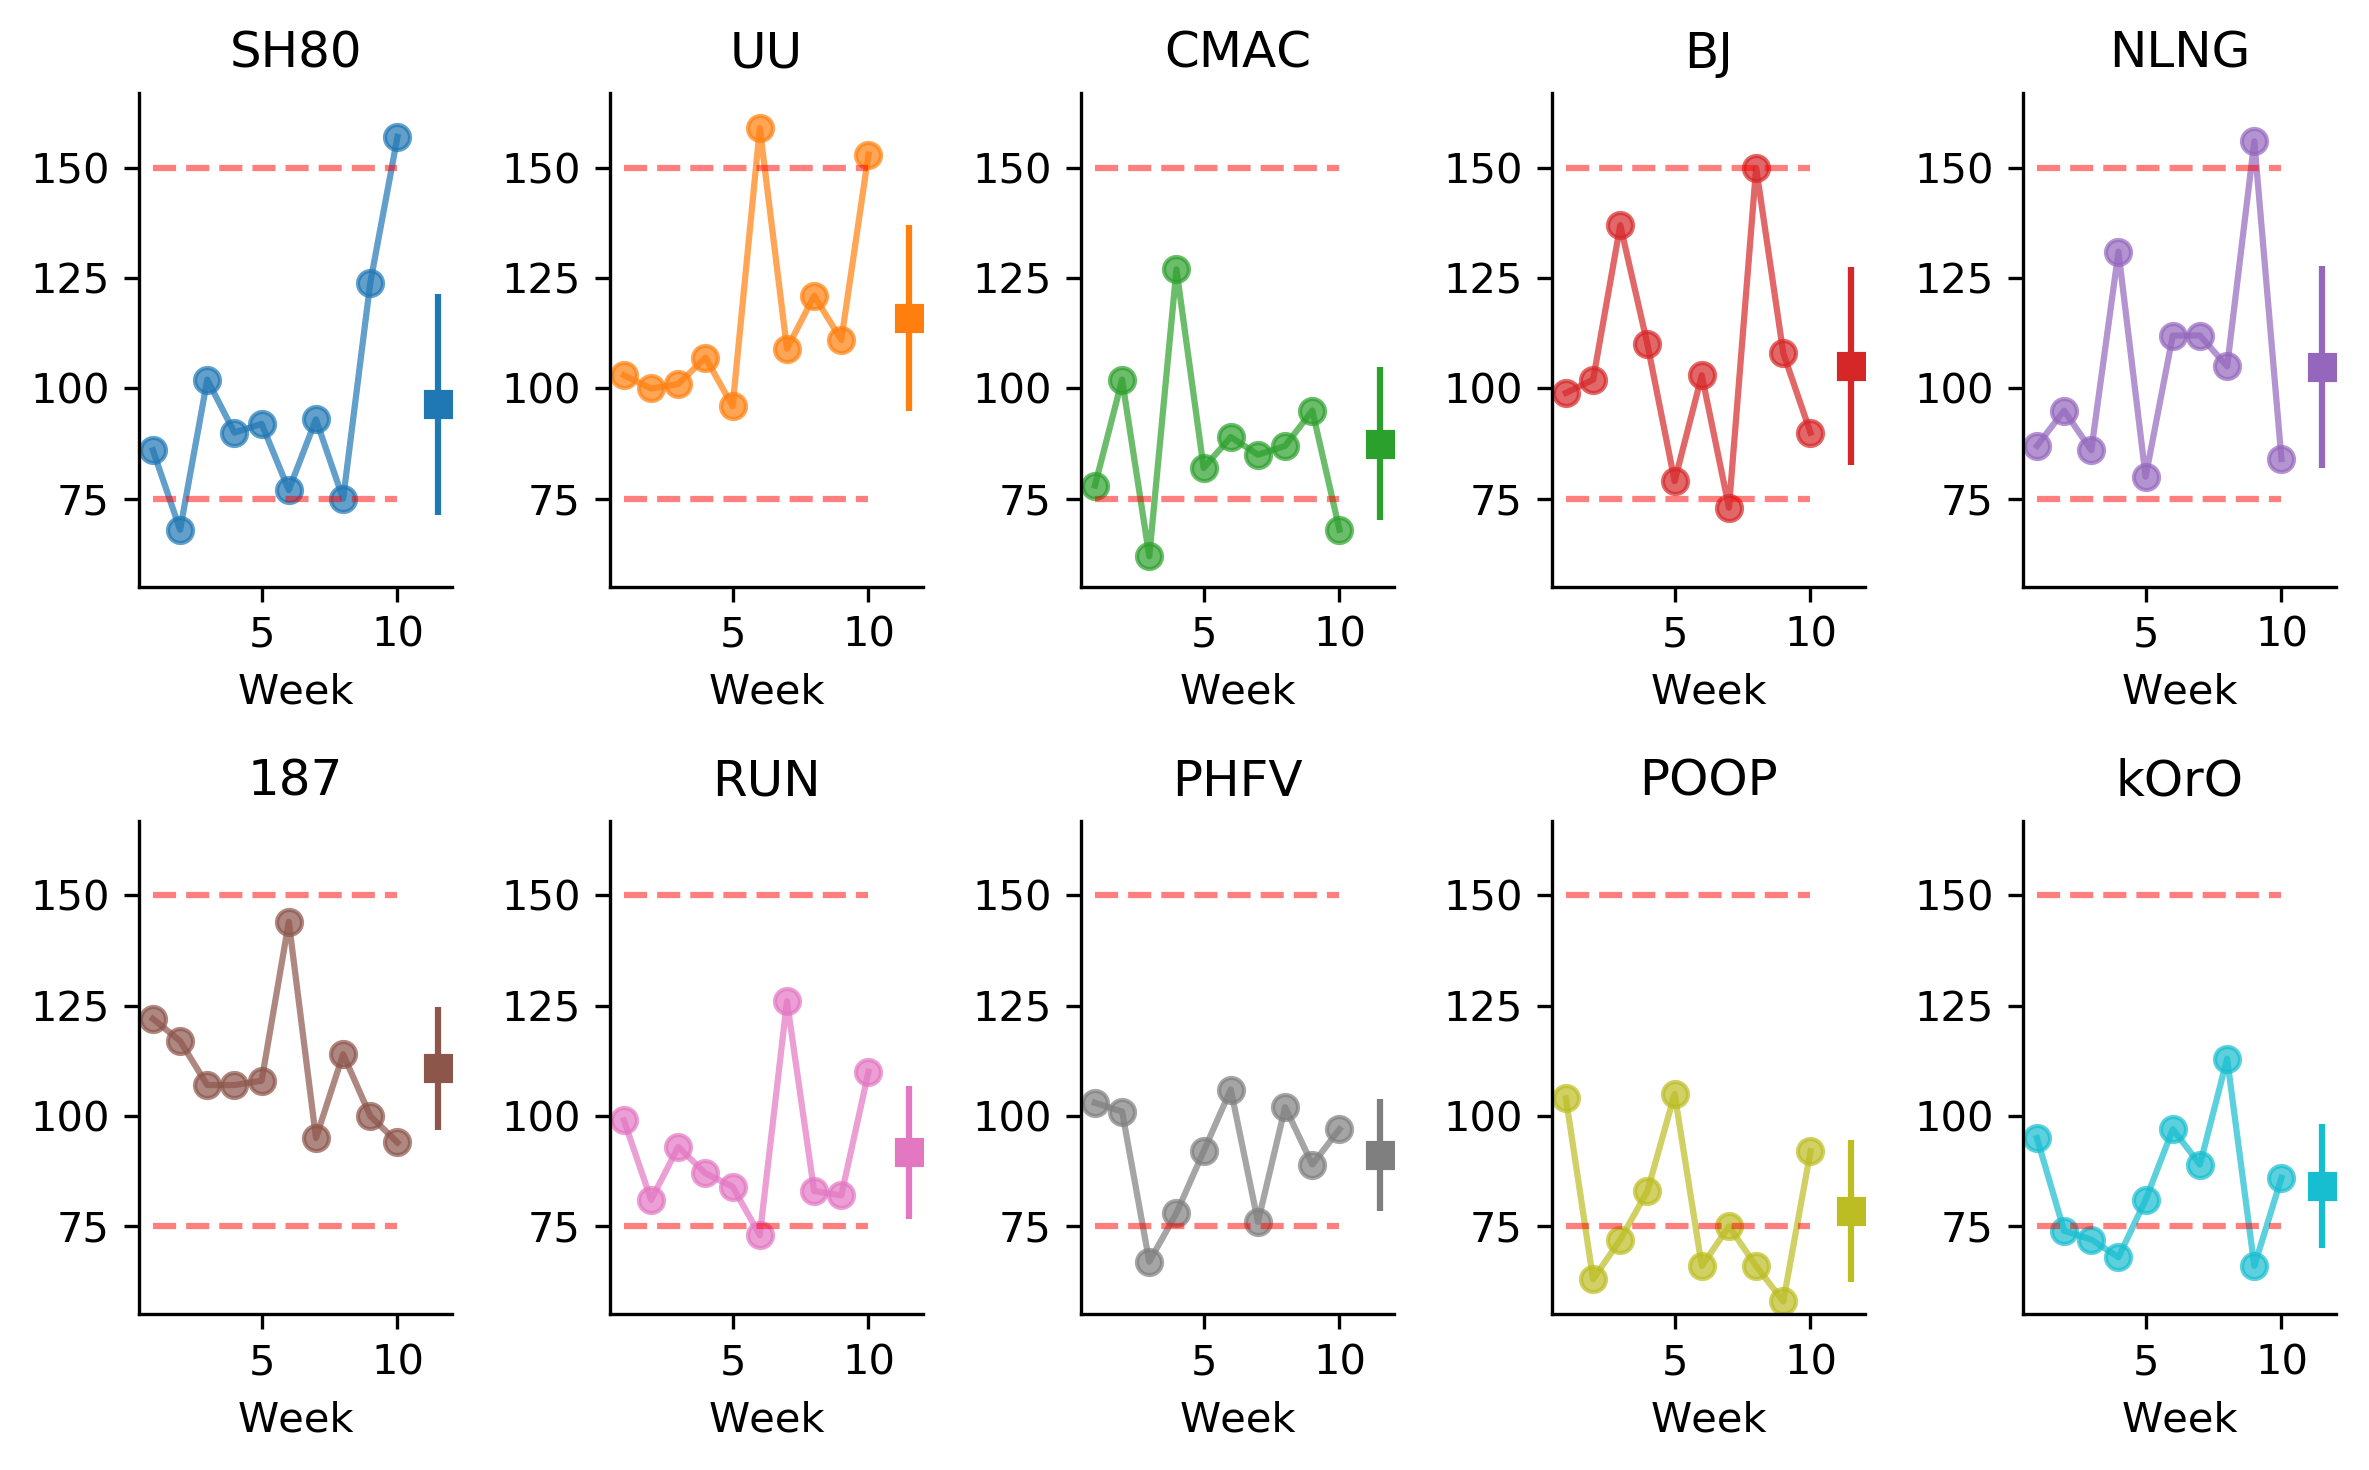

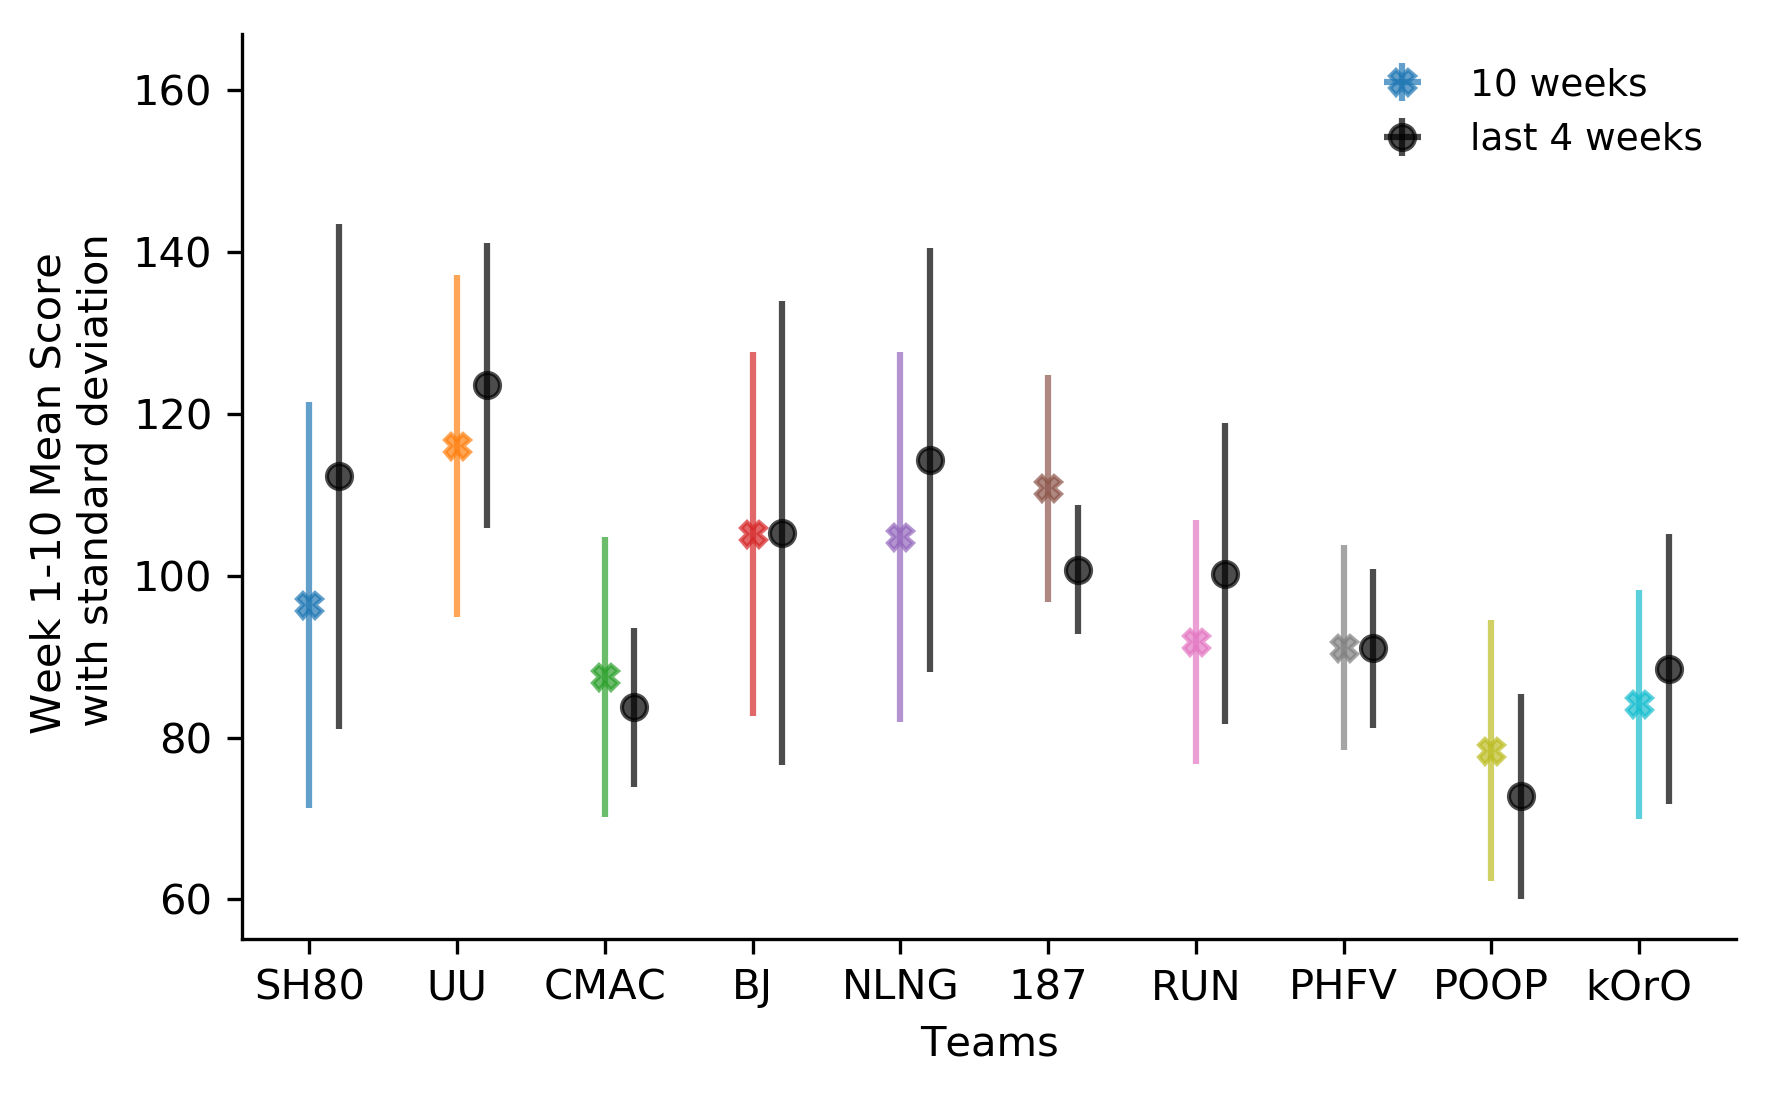

In [8]:
plt.figure(figsize=(8,5), dpi=300)

a = range(1,11)
b = np.asarray(a, dtype=int)

miny = np.min(np.asarray(df['Score'].values, dtype=int))
maxy = np.max(np.asarray(df['Score'].values, dtype=int))

for iiter,i in enumerate(b):  
    
    ax = plt.subplot(2,5,iiter+1)
    temp_name = np.unique(df['teamAbbrev'][df['teamId']==i])
#     print('temp name = %s' % temp_name)
    
    color_num = int(iiter)
    
    plotx = np.asarray(df['Week'][df['teamId']==i], dtype=int)
    ploty = np.asarray(df['Score'][df['teamId']==i], dtype=int)
    
    plt.plot(plotx, ploty, 
             'o-', color='C%s' % color_num,
             alpha=0.7, label=temp_name)
    
    plt.errorbar(x=11.5, y=np.mean(ploty), xerr=0, yerr=np.std(ploty), 
                 fmt='s',color='C%s' % color_num) 
    
    plt.title(temp_name[0])
#     plt.legend(loc=0, prop={'size': 9}, frameon=False)
    
    ax.set_ylim(miny*0.95, maxy*1.05)
    
    ax.set_xlabel('Week')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.plot(np.arange(1,11), 150 * np.ones(10), '--r', alpha=0.5)
    plt.plot(np.arange(1,11), 75 * np.ones(10), '--r', alpha=0.5)
    
plt.tight_layout()

plt.show()


## just plot errorbars
plt.figure(figsize=(6,6/1.6), dpi=300)

all_names = []
for iiter,i in enumerate(b):  
    temp_name = np.unique(df['teamAbbrev'][df['teamId']==i])
    all_names.append(temp_name[0])
    
    color_num = int(iiter)
    
    plotx = np.asarray(df['Week'][df['teamId']==i], dtype=int)
    ploty = np.asarray(df['Score'][df['teamId']==i], dtype=int)
    
    if iiter==0:
        plt.errorbar(x=iiter+1, y=np.mean(ploty), xerr=0, yerr=np.std(ploty), 
                     fmt='X',color='C%s' % color_num,
                     alpha=0.7, label='10 weeks')

        plt.errorbar(x=iiter+1+.2, y=np.mean(ploty[-4:]), xerr=0, yerr=np.std(ploty[-4:]), 
                     fmt='o',color='k',
                     alpha=0.7, label='last 4 weeks') 
    
        plt.legend(loc=0, prop={'size': 9}, frameon=False)
                     
    else:
        plt.errorbar(x=iiter+1, y=np.mean(ploty), xerr=0, yerr=np.std(ploty), 
                     fmt='X',color='C%s' % color_num,
                     alpha=0.7, label='10 weeks')

        plt.errorbar(x=iiter+1+.2, y=np.mean(ploty[-4:]), xerr=0, yerr=np.std(ploty[-4:]), 
                     fmt='o',color='k',
                     alpha=0.7, label='last 4 weeks') 

ax = plt.gca()
ax.set_ylim(miny*0.95, maxy*1.05)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(range(1,11))
ax.set_xticklabels(all_names)
ax.set_xlabel('Teams')
ax.set_ylabel('Week 1-10 Mean Score \n with standard deviation')
    
plt.tight_layout()

plt.show()

## go through future games and predict winner

## columns=['Week', 'teamAbbrev0', 'teamAbbrev1', 
                               'teamId0', 'teamId1', 'Score0', 'Score0','Winner']

In [56]:
df3 = df2.copy()

for i in range(50, len(df2)):
    
    team0 = df2['teamId0'][i]
    team1 = df2['teamId1'][i]
    
    # check winner based on average of all games
    mean0 = np.mean(np.asarray(df['Score'][df['teamId']==team0], dtype=int)[:])
    mean1 = np.mean(np.asarray(df['Score'][df['teamId']==team1], dtype=int)[:])
    
    df3['Score0'][i] = (mean0)
    df3['Score1'][i] = (mean1)
    
    # now check winner using only last 4 games
    mean0 = np.mean(np.asarray(df['Score'][df['teamId']==team0], dtype=int)[-4:])
    mean1 = np.mean(np.asarray(df['Score'][df['teamId']==team1], dtype=int)[-4:])
    
    df2['Score0'][i] = (mean0)
    df2['Score1'][i] = (mean1)
    
    
for i in range(len(df2)):
    
    if int(df2['Score0'][i]) >= int(df2['Score1'][i]):
        df2['Winner'][i] = df2['teamId0'][i]
    else:
        df2['Winner'][i] = df2['teamId1'][i]
        
    
    if int(df3['Score0'][i]) >= int(df3['Score1'][i]):
        df3['Winner'][i] = df3['teamId0'][i]
    else:
        df3['Winner'][i] = df3['teamId1'][i]

df2.head()

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ip

,Week,teamAbbrev0,teamAbbrev1,teamId0,teamId1,Score0,Score1,Winner
0,1,SH80,187,1,6,86,122,6
1,1,RUN,CMAC,7,3,99,78,7
2,1,POOP,PHFV,9,8,104,103,9
3,1,UU,NLNG,2,5,103,87,2
4,1,BJ,kOrO,4,10,99,95,4


In [57]:
all_teams2 = np.asarray(df2['Winner'].value_counts().keys())-1
all_wins2 =  df2['Winner'].value_counts().values

all_teams3 = np.asarray(df3['Winner'].value_counts().keys())-1
all_wins3 =  df3['Winner'].value_counts().values


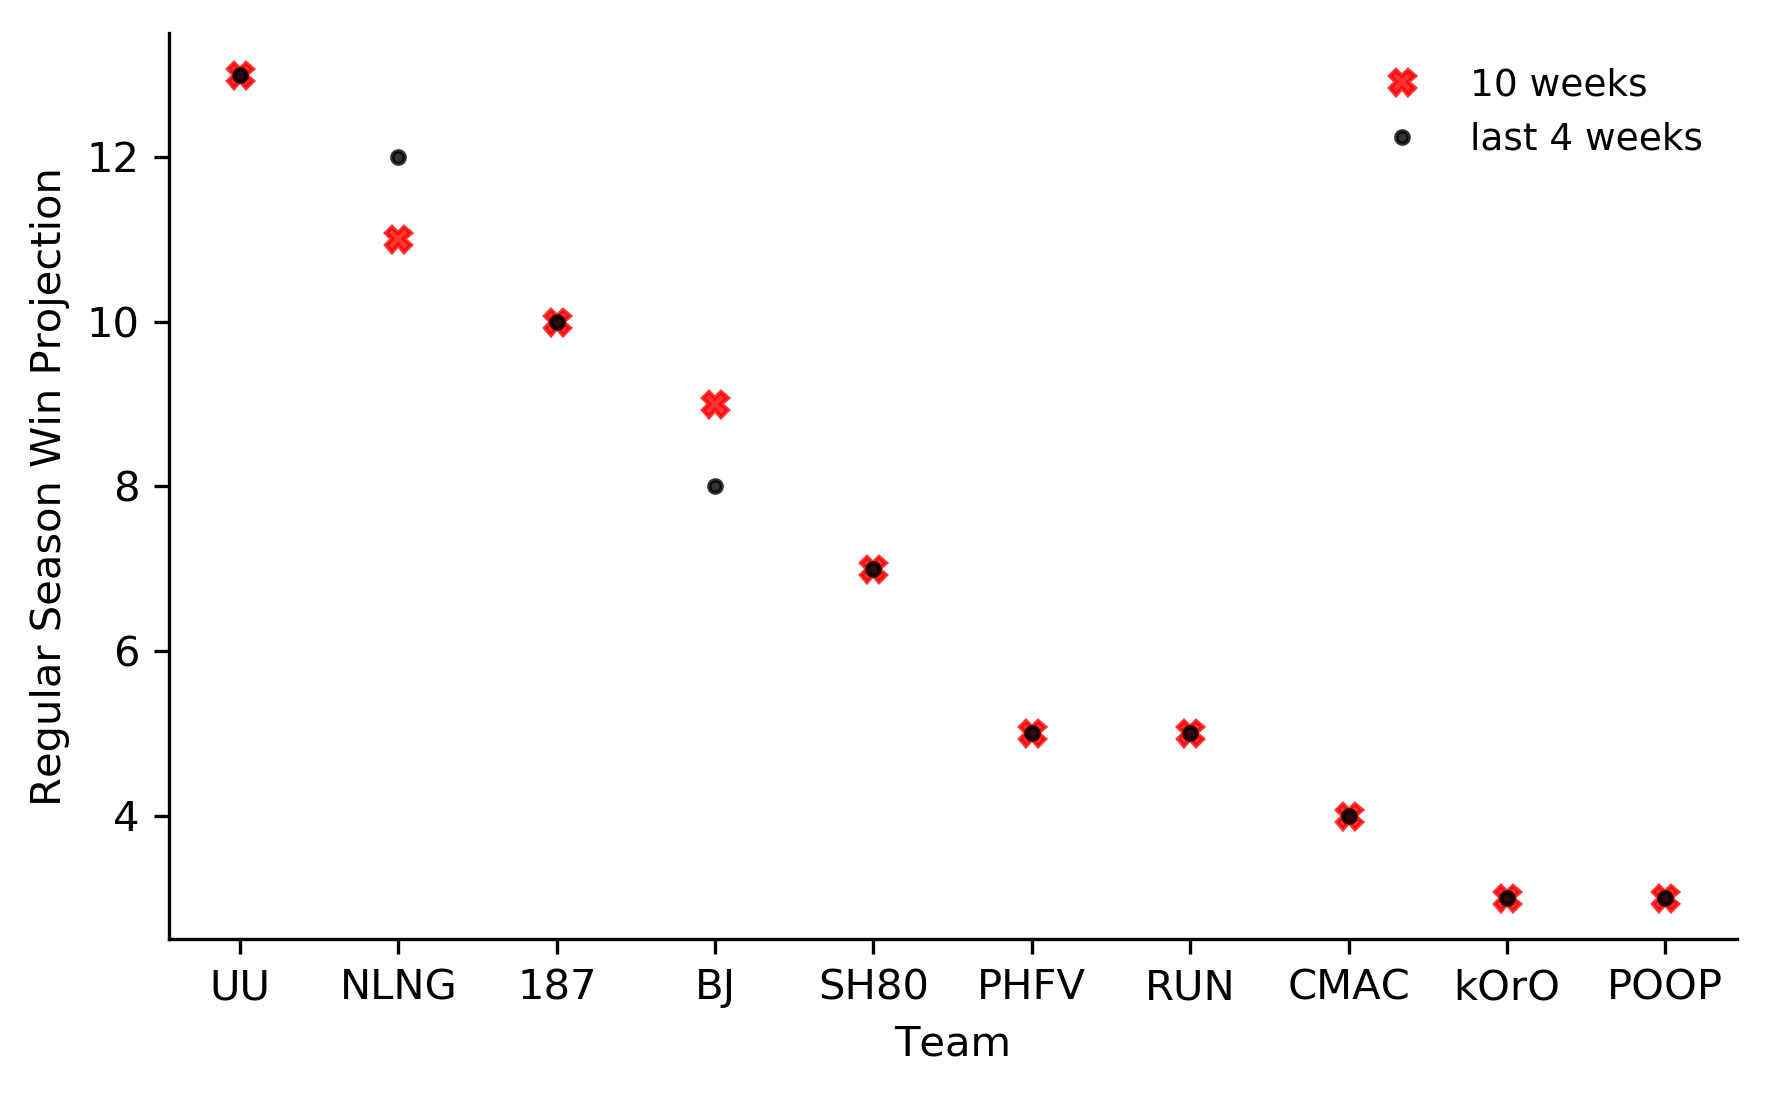

In [71]:
## just plot wins
plt.figure(figsize=(6,6/1.6), dpi=300)

all_names = []
for iiter,i in enumerate(b):  
    temp_name = np.unique(df['teamAbbrev'][df['teamId']==i])
    all_names.append(temp_name[0])

    
plt.plot(np.arange(1,11), all_wins3, 'Xr', label='10 weeks', alpha=0.8)
plt.plot(np.arange(1,11), all_wins2, '.k', label='last 4 weeks', alpha=0.8)

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(range(1,11))
ax.set_xticklabels(np.asarray(all_names)[all_teams])
ax.set_ylabel('Regular Season Win Projection')
ax.set_xlabel('Team')
    
plt.legend(loc=0, prop={'size': 9}, frameon=False)

plt.tight_layout()

plt.show()